In [1]:
#Assignment 4 - 21BCI0119 - Harshal Jain

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score


In [3]:
wine=pd.read_csv('/content/winequality-red.csv')

In [4]:
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [5]:
wine.shape

(1599, 12)

In [6]:
wine.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [7]:
wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [29]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


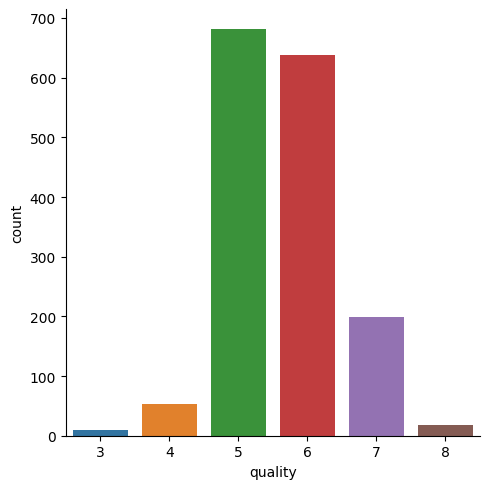

In [9]:
# number of values for each quality
sns.catplot(x='quality', data = wine, kind = 'count')

<Axes: xlabel='quality', ylabel='volatile acidity'>

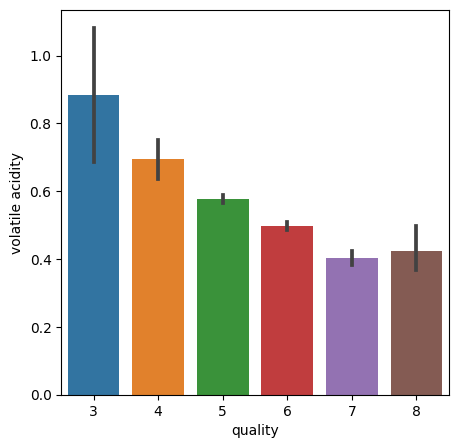

In [10]:
# volatile acidity vs Quality
plot = plt.figure(figsize=(5,5))
sns.barplot(x='quality', y = 'volatile acidity', data = wine)

<Axes: xlabel='quality', ylabel='citric acid'>

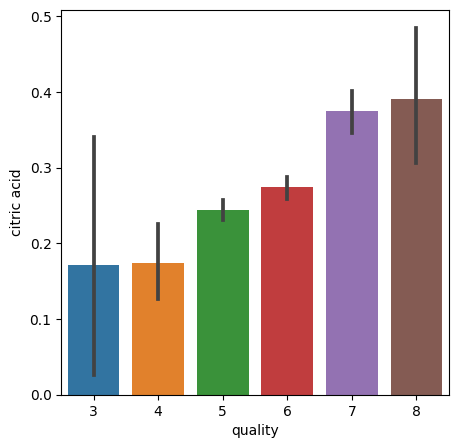

In [11]:
# citric acid vs Quality
plot = plt.figure(figsize=(5,5))
sns.barplot(x='quality', y = 'citric acid', data = wine)

In [12]:
#correlation

In [14]:
correlation = wine.corr()

<Axes: >

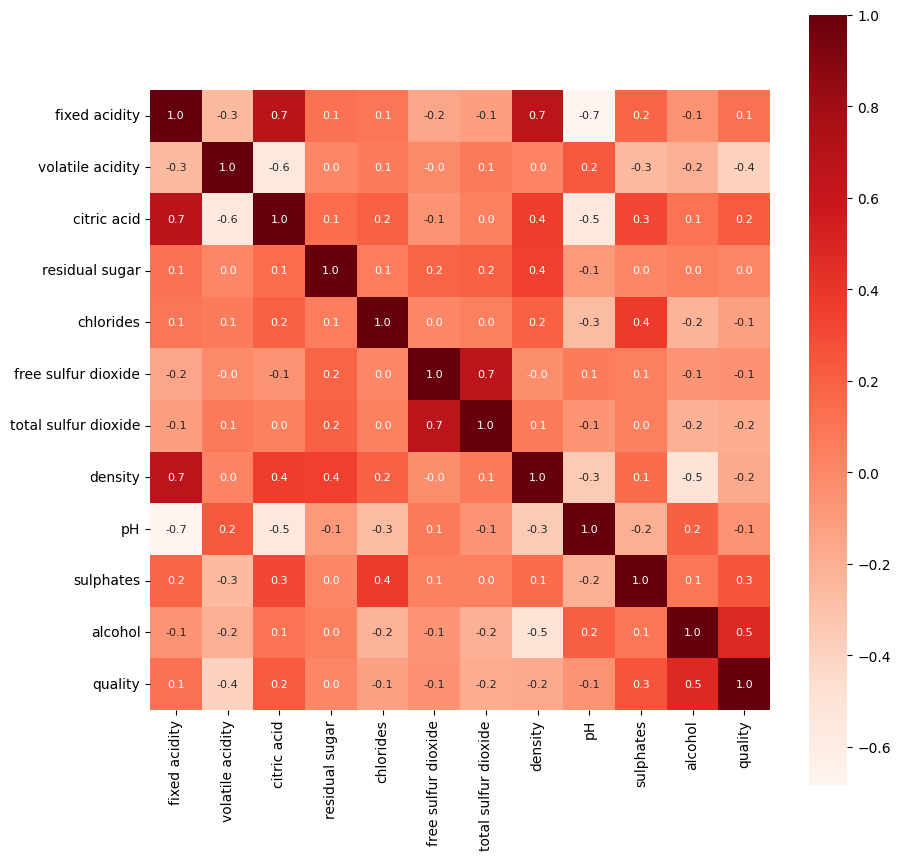

In [17]:
plt.figure(figsize=(10,10))
sns.heatmap(correlation, cbar=True, square=True, fmt = '.1f', annot = True, annot_kws={'size':8}, cmap = 'Reds')

Data Preprocessing

In [19]:
# separate the data and Label
X = wine.drop('quality',axis=1)
X

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2


Label Binarization

In [21]:
Y = wine['quality'].apply(lambda y_value: 1 if y_value>=7 else 0)
Y

0       0
1       0
2       0
3       0
4       0
       ..
1594    0
1595    0
1596    0
1597    0
1598    0
Name: quality, Length: 1599, dtype: int64

Train and Test Split

In [22]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=3)
Y.shape, Y_train.shape, Y_test.shape

((1599,), (1279,), (320,))

Model Training:
Random Forest Classifier

In [23]:
model = RandomForestClassifier()
model.fit(X_train, Y_train)

RandomForestClassifier()

Model Evaluation
and Accuracy Score

In [24]:
# accuracy on test data
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [27]:
print('Accuracy : ', test_data_accuracy)

Accuracy :  0.915625


In [28]:
input_data = (7.5,0.5,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.8,10.5)

# changing the input data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the data as we are predicting the label for only one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = model.predict(input_data_reshaped)
print(prediction)

if (prediction[0]==1):
  print('Good Quality Wine')
else:
  print('Bad Quality Wine')

[0]
Bad Quality Wine


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [32]:
#method 2 for the model

Method 2 for the model

In [33]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE


In [35]:
# Converting the quality column into a categorical variable with three levels: low (3-5), medium (6-7), and high (8-9)
wine['quality_label'] = pd.cut(wine['quality'], bins=[2, 5, 7, 9], labels=['low', 'medium', 'high'])


In [36]:
# Checking the distribution of the quality label
wine['quality_label'].value_counts()

medium    837
low       744
high       18
Name: quality_label, dtype: int64

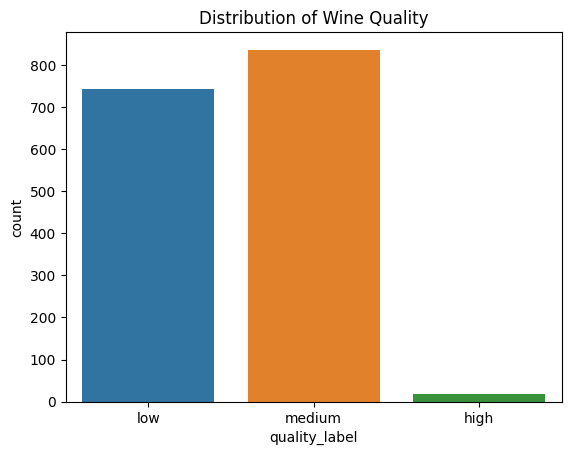

In [37]:
# Plotting a histogram of the quality label
sns.countplot(x='quality_label', data=wine)
plt.title('Distribution of Wine Quality')
plt.show()

<ipython-input-38-3fc336d73c4a>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(wine.corr(), annot=True, cmap='RdBu')


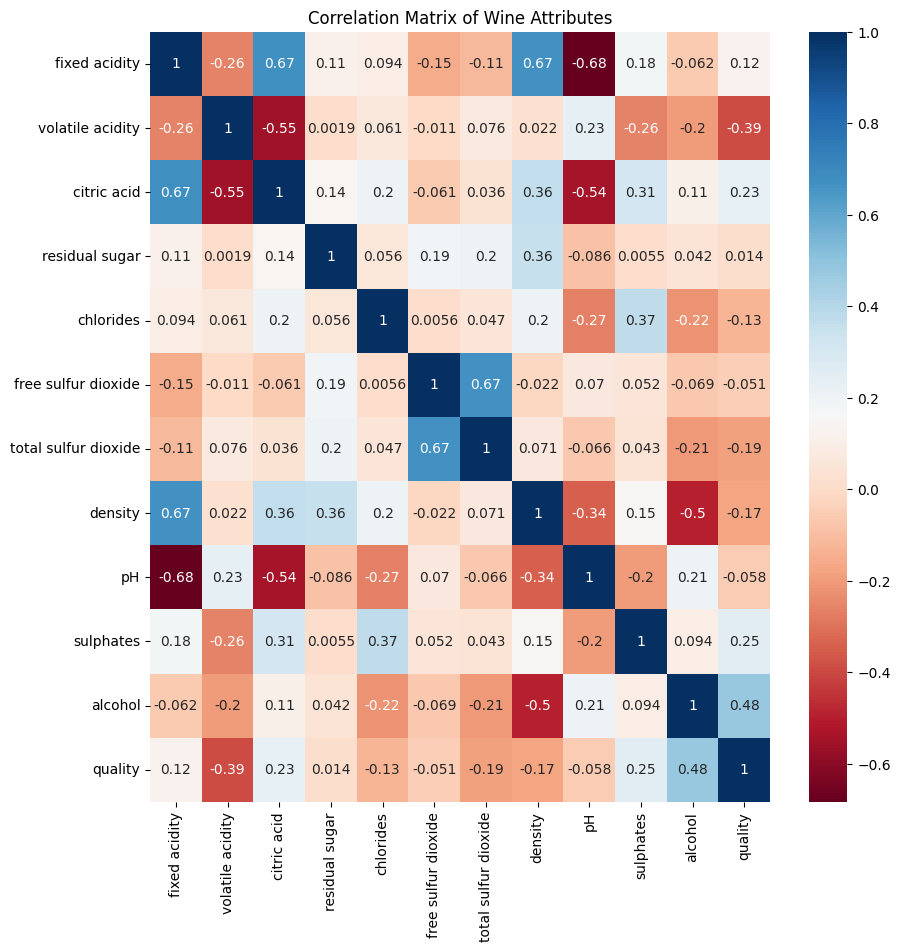

In [38]:
# Plotting a correlation matrix
plt.figure(figsize=(10, 10))
sns.heatmap(wine.corr(), annot=True, cmap='RdBu')
plt.title('Correlation Matrix of Wine Attributes')
plt.show()


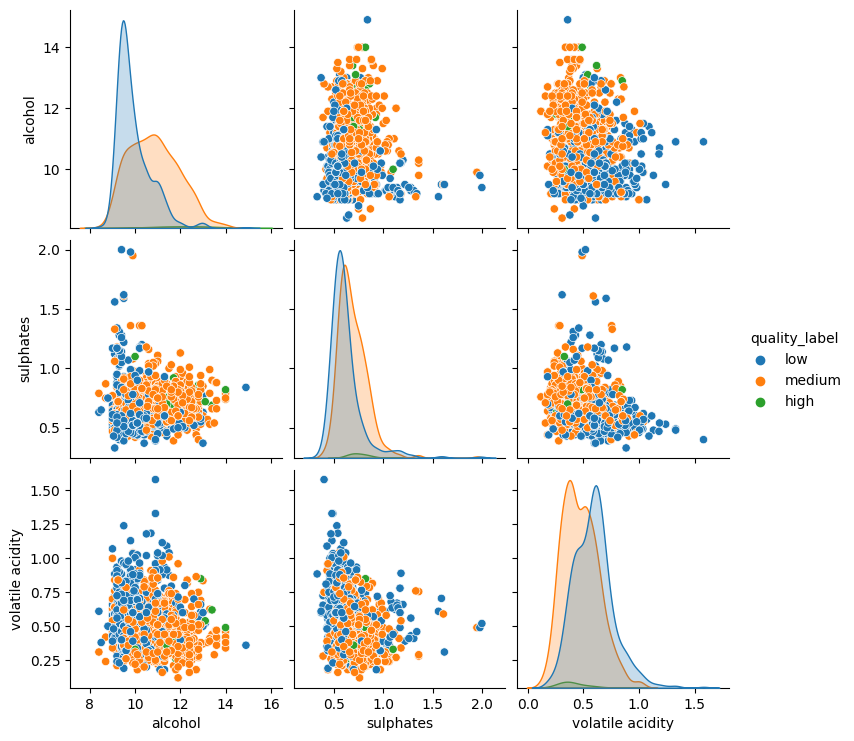

In [40]:
# Plotting a pairplot of some variables
sns.pairplot(wine[['alcohol', 'sulphates', 'volatile acidity', 'quality_label']], hue='quality_label')
plt.show()

In [42]:
# Splitting the dataset into features (X) and target (y)
X = wine.drop(['quality', 'quality_label'], axis=1)
y = wine['quality_label']


In [43]:
# Splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [44]:
# Data Preprocessing
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_scaled = scaler.fit_transform(X)


In [45]:
# Define the number of components you want to keep (e.g., 2 for visualization)
n_components = 2
# Create a PCA instance
pca = PCA(n_components=n_components)


In [46]:
# Fit and transform the data to reduce dimensionality
X_pca = pca.fit_transform(X_scaled)


In [47]:
# Calculate the explained variance ratio
explained_variance = pca.explained_variance_ratio_
print("Explained Variance Ratios:", explained_variance)

Explained Variance Ratios: [0.28173931 0.1750827 ]


In [48]:
# Create a DataFrame for the reduced data
df_pca = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2'])  # Adjust column names as needed


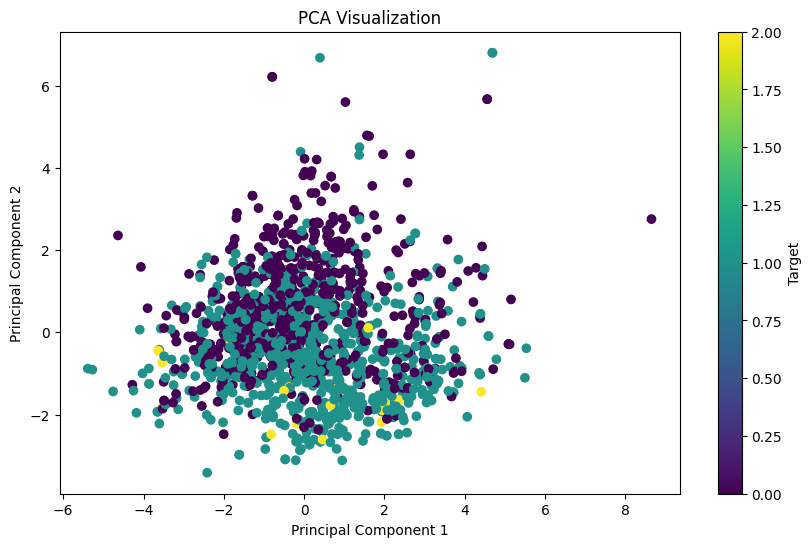

In [49]:
# Visualize PCA Results with Colors for Class Labels
plt.figure(figsize=(10, 6))
# Replace 'y' with numeric labels if needed
plt.scatter(df_pca['PC1'], df_pca['PC2'], c=y.cat.codes, cmap='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Visualization')
plt.colorbar(label='Target')
plt.show()

In [50]:
# Addressing class imbalance using SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [51]:
# Defining the parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [52]:
# Creating a Random Forest Classifier
rf_classifier = RandomForestClassifier(random_state=42)

In [53]:
# Performing GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=3, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train_resampled, y_train_resampled)

GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='accuracy')

In [54]:
# Getting the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

Best Hyperparameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 300}


In [55]:
# Training the model with the best hyperparameters
best_rf_classifier = RandomForestClassifier(random_state=42, **best_params)
best_rf_classifier.fit(X_train_resampled, y_train_resampled)

RandomForestClassifier(min_samples_split=5, n_estimators=300, random_state=42)

In [56]:
# Making predictions on the test set
y_pred = best_rf_classifier.predict(X_test)

In [57]:
# Evaluating the model's performance
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)
confusion_mat = confusion_matrix(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")
print(f"Classification Report:\n{classification_rep}")
print(f"Confusion Matrix:\n{confusion_mat}")

Accuracy: 0.7875
Classification Report:
              precision    recall  f1-score   support

        high       0.17      0.20      0.18         5
         low       0.78      0.80      0.79       141
      medium       0.81      0.79      0.80       174

    accuracy                           0.79       320
   macro avg       0.59      0.60      0.59       320
weighted avg       0.79      0.79      0.79       320

Confusion Matrix:
[[  1   0   4]
 [  0 113  28]
 [  5  31 138]]


In [58]:
# Testing with a random observation
sample = np.array([7.4, 0.7, 0.0, 1.9, 0.076,
                   11.0, 34.0, 0.9978,
                   3.51,
                   0.56,
                   9.4]).reshape(1,-1)
from sklearn.linear_model import LogisticRegressionCV

# Create a logistic regression model
logreg = LogisticRegressionCV()

# Fit the model with your training data
logreg.fit(X_train, y_train)

# Now, you can make predictions with the fitted model
sample_pred = logreg.predict(sample)

# Print the predicted quality label for the sample
print('The predicted quality label for this sample is:', sample_pred[0])


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


The predicted quality label for this sample is: low


As we can see from the above 2 models the model with the RandomClassifier method gives accuracy of 91.5625 whereas the second method only gives an accuracy of 78.75, so we can say that our first model is better and more accurate.